In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='notebook', style='darkgrid', palette='pastel', font='sans-serif', font_scale=1.2)

In [2]:
df = pd.read_csv('Titanic.csv', index_col='PassengerId')

In [3]:
df.head(101)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [4]:
df.shape

(891, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.drop(columns='Cabin').isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [8]:
df = df.drop(columns='Cabin').dropna(subset=['Embarked'])

In [9]:
cols = [
    'Name', 'Sex', 'Age', 'Parch', 'SibSp',
    'Ticket', 'Pclass', 'Embarked', 'Fare',
    'Survived'
]

df = df[cols]

In [10]:
df.head(101)

,Name,Sex,Age,Parch,SibSp,Ticket,Pclass,Embarked,Fare,Survived
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",male,22.0,0,1,A/5 21171,3,S,7.2500,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,1,PC 17599,1,C,71.2833,1
3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,3,S,7.9250,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,1,113803,1,S,53.1000,1
5,"Allen, Mr. William Henry",male,35.0,0,0,373450,3,S,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
98,"Greenfield, Mr. William Bertram",male,23.0,1,0,PC 17759,1,C,63.3583,1
99,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,1,0,231919,2,S,23.0000,1
100,"Kantor, Mr. Sinai",male,34.0,0,1,244367,2,S,26.0000,0


In [11]:
df.shape

(889, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      889 non-null    object 
 1   Sex       889 non-null    object 
 2   Age       712 non-null    float64
 3   Parch     889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Ticket    889 non-null    object 
 6   Pclass    889 non-null    int64  
 7   Embarked  889 non-null    object 
 8   Fare      889 non-null    float64
 9   Survived  889 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


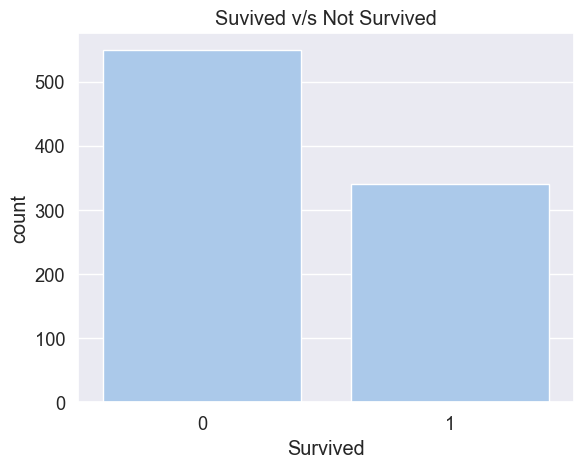

In [13]:
sns.countplot(data=df, x='Survived')

plt.title('Suvived v/s Not Survived')
plt.show();

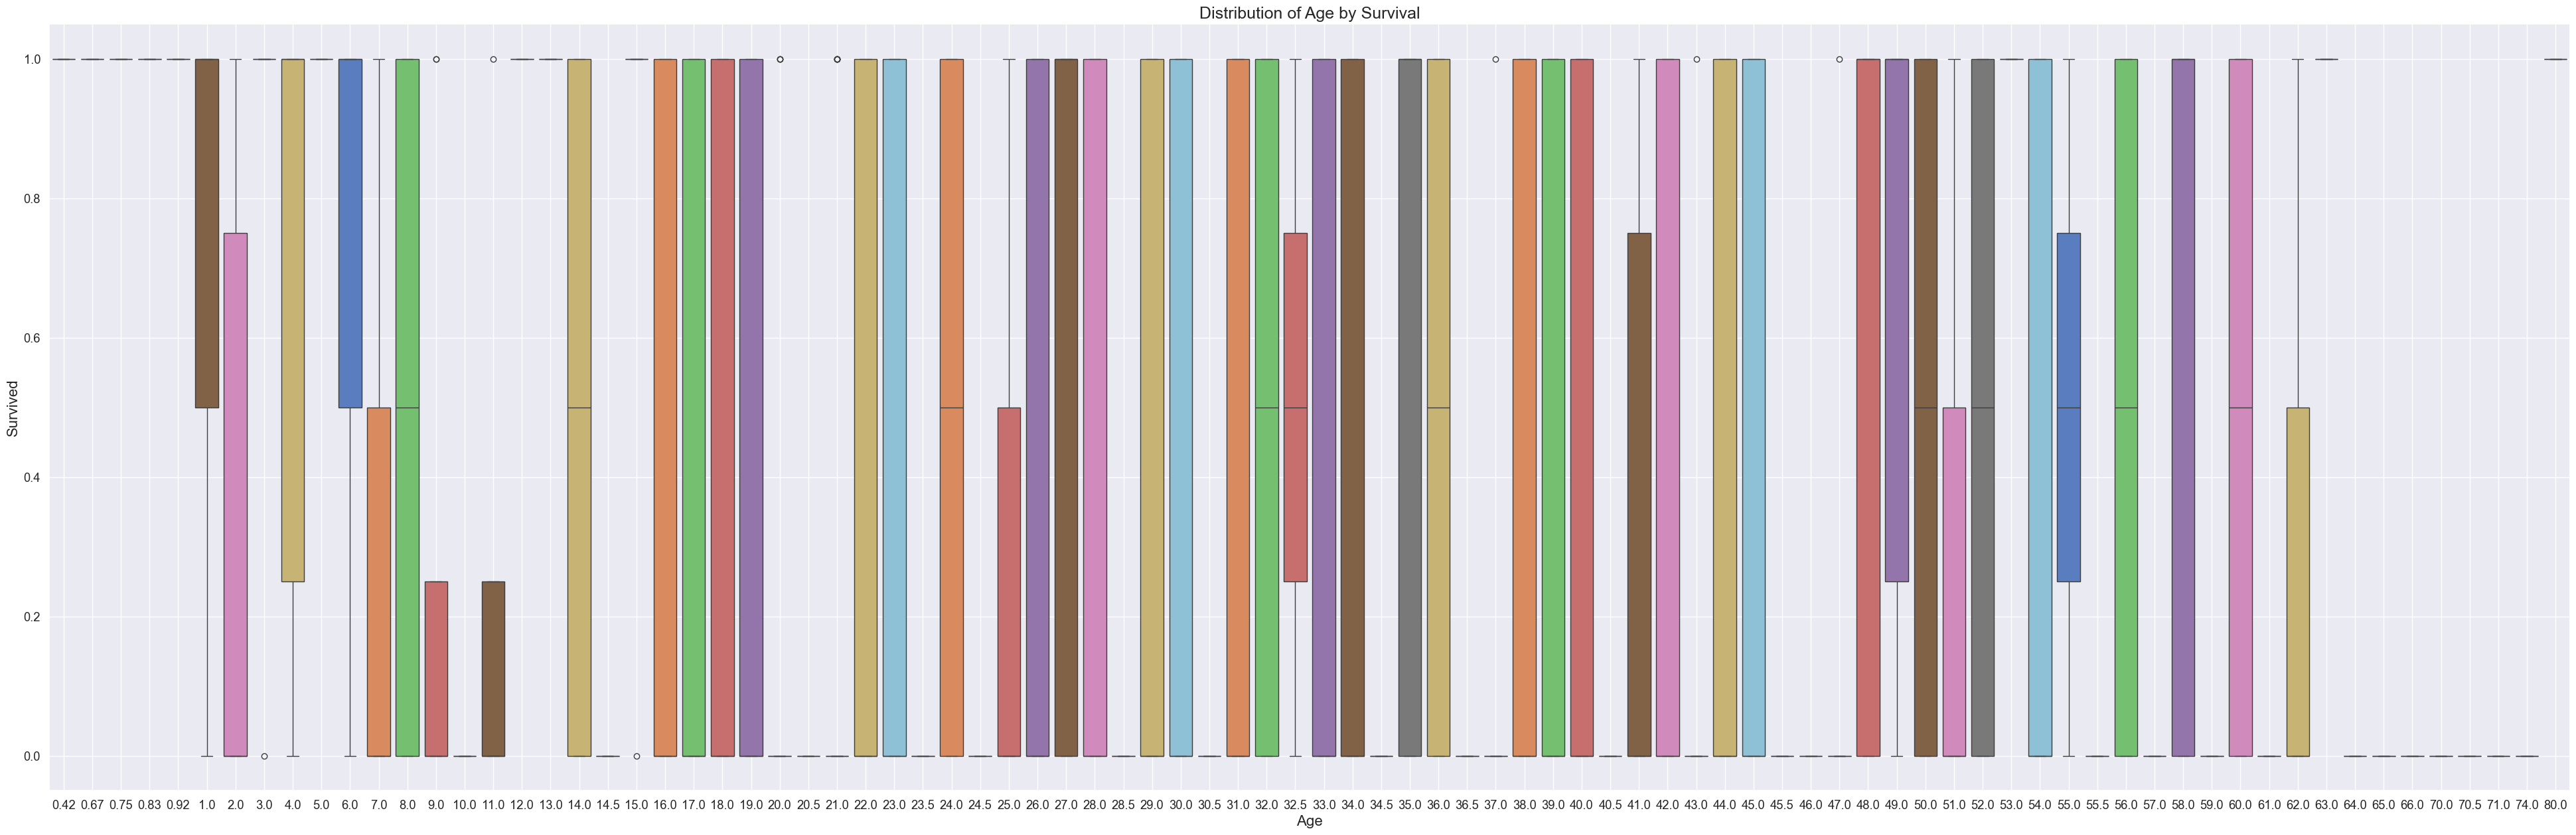

In [21]:
plt.figure(figsize=(49, 15))
sns.boxplot(data=df, x='Age', y='Survived', palette='muted')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Survived', fontsize=16)
plt.title('Distribution of Age by Survival', fontsize=18)
plt.grid(True)
plt.show()

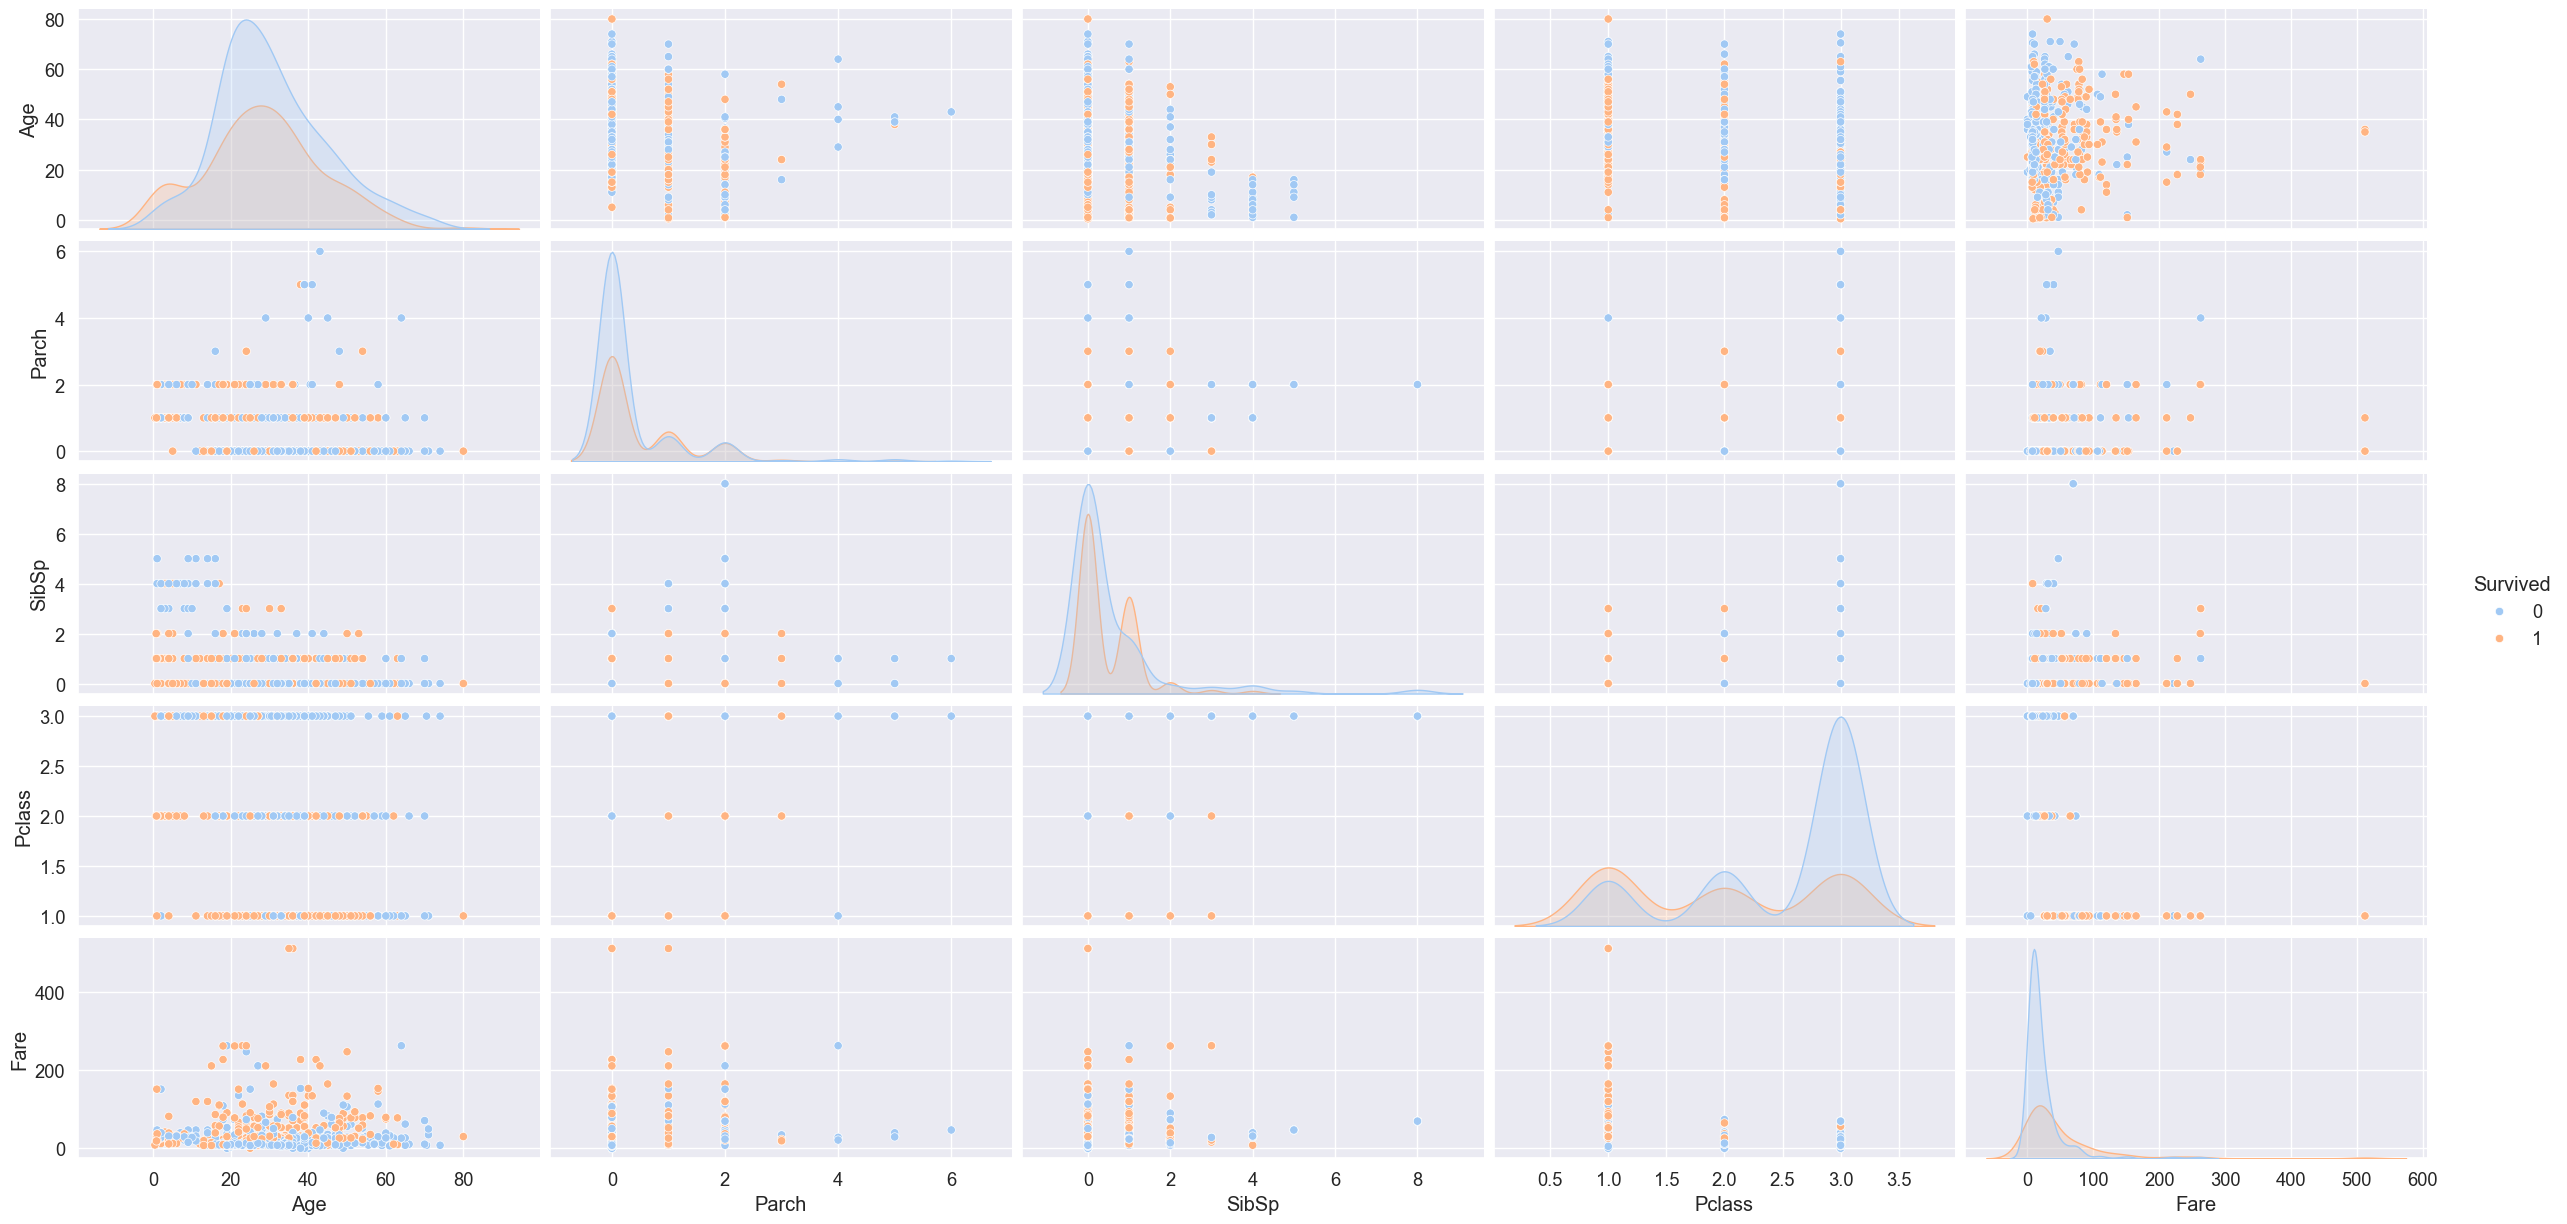

In [22]:
sns.pairplot(data=df, hue='Survived', aspect=2);

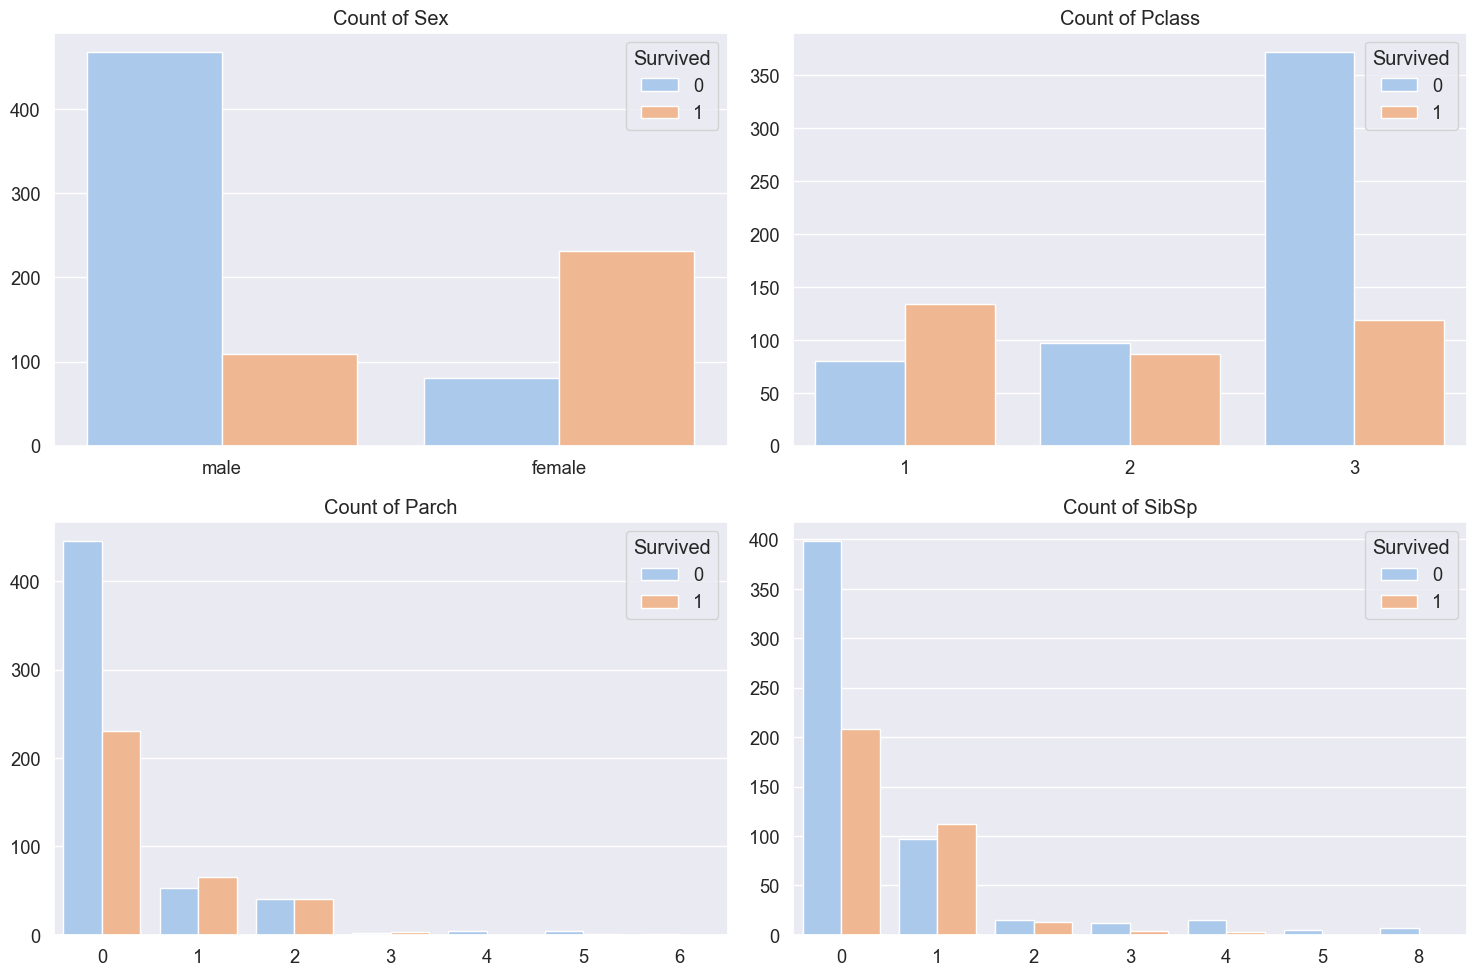

In [23]:
cat_cols = ['Sex', 'Pclass', 'Parch', 'SibSp']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for feature, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(data=df, x=feature, hue='Survived', ax=ax)
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show();